#**1.IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio 
 
pio.renderers.default = "svg" 

#**2.LOADING THE DATASET**

In [2]:
raw_ds = pd.read_csv('Zomato Chennai Listing 2020.csv') 

In [3]:
raw_ds.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


#**3.GETTING BASIC INFORMATION ABOUT THE DATASET**

In [4]:
raw_ds.shape

(12032, 12)

In [5]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
raw_ds.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


#**4. CLEANING THE DATASET**

#**a.Dropping the duplicated rows and useless column**

In [7]:
#1.hecking the duplicate records
raw_ds[raw_ds.duplicated()]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [8]:
#2.dropping column which are not required for further analysis
raw_ds.drop(['Zomato URL','Address'],axis=1,inplace=True)

In [9]:
raw_ds.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


#**b. Removing the Null Records**


In [10]:
#Checking for Null records in the dataset
raw_ds.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [11]:
#Replacing the null values with 0
raw_ds["Dining Rating"].fillna(0,inplace=True)
raw_ds.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\2390559890.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating               0
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [12]:
#Replacing the  null values with '0' in Dining Rating column
raw_ds["Dining Rating Count"].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\1762316612.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [13]:
#Replace the null values with 0 in Delivery Rating column
raw_ds['Delivery Rating'].fillna(0,inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\2136402698.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [14]:
#Replacing the null values with '0'
raw_ds["Delivery Rating Count"].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\1633553088.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





#**c. Converting the DataTypes of numerical columns to numeric dataype**


In [15]:
raw_ds['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: count, Length: 794, dtype: int64

In [16]:
# Replacing the text values with '0' 
raw_ds['Dining Rating Count'].replace(to_replace=['Does not offer Dining','Not enough Dining Reviews'],value='0',inplace=True)


In [17]:
raw_ds['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
0                               220
27                               34
37                               30
                               ... 
3530                              1
7705                              1
6374                              1
1773                              1
1617                              1
Name: count, Length: 2282, dtype: int64

In [18]:
# Replacing the text values with '0' 
raw_ds['Delivery Rating Count'].replace(to_replace=['Not enough Delivery Reviews','Does not offer Delivery'],value='0',inplace=True)

In [19]:
# Changing Data Type of the numerical columns 
raw_ds['Price for 2'] = raw_ds['Price for 2'].astype('int64')
raw_ds['Dining Rating Count'] = raw_ds['Dining Rating Count'].astype('int64')
raw_ds['Delivery Rating Count'] = raw_ds['Delivery Rating Count'].astype('int64')

In [20]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  int64  
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
 9   Features               12032 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 940.1+ KB


#**d. Removing the restaurant records whose Rating or Votes is 0**


In [21]:
# Finding those restaurant whose has 0 Rating or Votes 
useless_data=(raw_ds['Dining Rating']==0.0)|(raw_ds['Dining Rating Count']==0)
raw_ds[useless_data]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350,0.0,0,4.3,1061,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300,0.0,0,3.9,19600,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350,0.0,0,4.0,11200,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200,0.0,0,4.2,11500,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300,0.0,0,3.9,652,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


In [22]:
raw_ds = raw_ds[~useless_data] 

In [23]:
useless_data1=(raw_ds['Delivery Rating']==0.0)|(raw_ds['Delivery Rating Count']==0)
raw_ds[useless_data1]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,Welcome Hotel,Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300,4.5,1094,0.0,0,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
18,Wire Room Bar & Kitchen,"Phoenix Market City, Velachery","['Continental', ' Asian']","['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...",2000,4.1,354,0.0,0,"['Full Bar Available', 'Mall Parking', 'Dance ..."
23,BFF 2.0,RA Puram,"['North Indian', ' Continental', ' Italian']","['Crispy Chicken', ' Cocktails', ' Pizza', ' N...",1500,4.2,464,0.0,0,"['Full Bar Available', 'Indoor Seating', 'Nigh..."
85,Bazaar - All Day Diner - Grand by GRT Hotels,Grand by GRT Hotels,"['North Indian', ' South Indian', ' Continenta...","['Pizza', ' Pasta', ' Fish', ' Chaat', ' Momos...",2500,4.4,1198,0.0,0,"['Breakfast', 'Home Delivery', 'Serves Alcohol..."
89,Coal Barbecues,Velachery,"['North Indian', ' Chinese']","['Chicken Honey', ' Fish', ' Prawn', ' Waffles...",1400,4.4,9410,0.0,0,"['Indoor Seating', 'Buffet', 'Table reservatio..."
...,...,...,...,...,...,...,...,...,...,...
11711,London Bakery,Pallavaram,"['Bakery', ' Fast Food', ' Beverages']",Invalid,400,3.2,9,0.0,0,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
11714,Kumbakonam Filter Coffee,"OMR Food Street, Navallur",['Beverages'],Invalid,100,2.0,4,0.0,0,"['Vegetarian Only', 'Outdoor Seating']"
11773,Kekiz The Cake Shop,Purasavakkam,"['Bakery', ' Desserts']",Invalid,450,2.9,6,0.0,0,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
11801,Amma Unavagam,K.K. Nagar,['South Indian'],Invalid,150,3.3,5,0.0,0,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."


In [24]:
raw_ds = raw_ds[~useless_data1] 

#**e.Working on 'Location' Column**


In [25]:
raw_ds['Location'].value_counts()

Location
Porur                                      148
Anna Nagar East                            145
Velachery                                  145
Ambattur                                   123
T. Nagar                                   119
                                          ... 
Fairfield by Marriot, Chengalpattu           1
Hilton Chennai, Guindy                       1
Abhiramapuram                                1
Hotel Marina Inn, Egmore                     1
Spectrum The Grand Venus Mall, Perambur      1
Name: count, Length: 161, dtype: int64

In [26]:
raw_ds['Location']=raw_ds['Location'].str.replace('East|east|West|west','',regex=True)


In [27]:
raw_ds['Location']=raw_ds['Location'].str.replace('Gokulam Park Hotel','Ashok Nagar',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('T.Nagar|T. Nagar','T.Nagar',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('East Coast Road (ECR)','ECR',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('The Savera Hotel,RK Salai (Cathedral Road)','Mylapore',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('Old Mahabalipuram Road (OMR)|Dash@OMR|Days Hotel|IBIS Hote|RMZ Millenia Business Park','OMR',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('Hotel Maris','Gopalapuram',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('V7 Hotel','Porur',regex=True)
raw_ds['Location']=raw_ds['Location'].str.replace('Potheri','Kanchipuram District',regex=True)

In [28]:
raw_ds

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
11666,Juice World,Alandur,"['Beverages', ' Fast Food']",Invalid,300,2.0,4,3.9,42,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
11667,Juice World,Palavakkam,"['Beverages', ' Fast Food']",Invalid,300,2.0,4,3.9,48,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"['South Indian', ' Sandwich', ' Chinese', ' St...",Invalid,200,3.2,6,3.9,48,"['Home Delivery', 'Indoor Seating']"
11785,Engineers Kitchen,Ambattur,"['North Indian', ' Chinese', ' Andhra']",Invalid,400,2.5,6,3.5,214,"['Home Delivery', 'Indoor Seating']"


#**5. Copying the cleaned data into a new DataFrame**


In [29]:
Chennai_zomato_df = raw_ds.copy() 

In [30]:
Chennai_zomato_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


#**5. Performing Exploratory Data Analysis**

#**Q1) a. What are the percentage of restaurants by Cuisine Type in Chennai?**

In [31]:
#!pip install -U kaleido

In [32]:
Chennai_zomato_df['Cuisine']=Chennai_zomato_df['Cuisine'].str.split(',')

In [33]:
Chennai_zomato_df=Chennai_zomato_df.explode('Cuisine')

In [34]:
Chennai_zomato_df.to_csv('ChennaiZomato.csv',index=False)

In [35]:
Chennai_zomato_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,['Biryani',"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
1,Sukkubhai Biriyani,Alandur,' North Indian',"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
1,Sukkubhai Biriyani,Alandur,' Mughlai',"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
1,Sukkubhai Biriyani,Alandur,' Desserts',"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
...,...,...,...,...,...,...,...,...,...,...
11785,Engineers Kitchen,Ambattur,['North Indian',Invalid,400,2.5,6,3.5,214,"['Home Delivery', 'Indoor Seating']"
11785,Engineers Kitchen,Ambattur,' Chinese',Invalid,400,2.5,6,3.5,214,"['Home Delivery', 'Indoor Seating']"
11785,Engineers Kitchen,Ambattur,' Andhra'],Invalid,400,2.5,6,3.5,214,"['Home Delivery', 'Indoor Seating']"
11794,That Juice Shop,Karapakkam,['Juices',Invalid,200,3.6,6,4.2,157,"['Home Delivery', 'Indoor Seating']"


In [36]:
cuisine_type_df= Chennai_zomato_df['Cuisine'].value_counts().reset_index()
cuisine_type_df.rename(columns={'Cuisine':'Cuisine Type','count':'No. of cuisines'},inplace=True)
cuisine_type_df

,Cuisine Type,No. of cuisines
0,' Chinese',852
1,' Beverages'],673
2,' North Indian',593
3,['North Indian',588
4,' Fast Food'],571
...,...,...
214,['Middle Eastern'],1
215,['Mangalorean',1
216,' Bengali'],1
217,' Greek',1


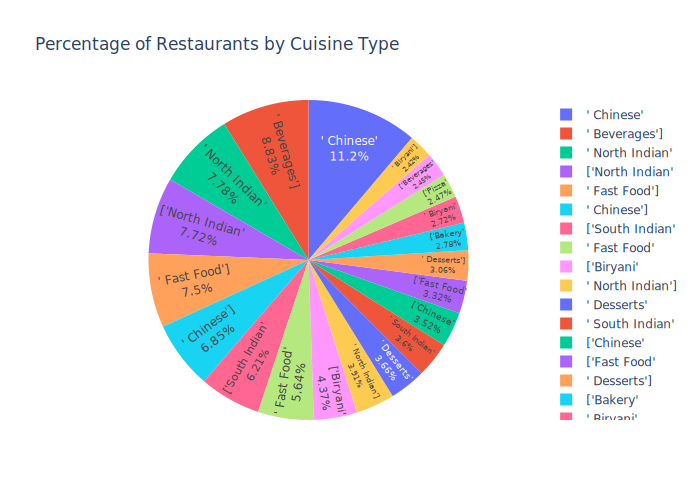

In [37]:
fig = px.pie(cuisine_type_df.head(20), names='Cuisine Type', values='No. of cuisines', color='Cuisine Type',
             title='Percentage of Restaurants by Cuisine Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#**Q1) b. How many restaurants are in Chennai for each type of cuisine?**


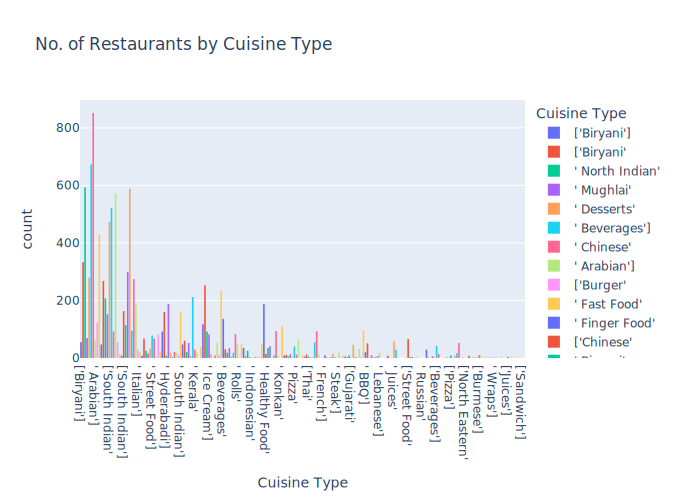

In [38]:
fig = px.histogram(Chennai_zomato_df, x='Cuisine', color='Cuisine',
                   title= 'No. of Restaurants by Cuisine Type',
                   labels={'Cuisine':'Cuisine Type'}) 
fig.show() 


#**Q3) What are the percentage of restaurants by Rating Type in Chennai?**

In [39]:
Chennai_zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12311 entries, 0 to 11794
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12311 non-null  object 
 1   Location               12311 non-null  object 
 2   Cuisine                12311 non-null  object 
 3   Top Dishes             12311 non-null  object 
 4   Price for 2            12311 non-null  int64  
 5   Dining Rating          12311 non-null  float64
 6   Dining Rating Count    12311 non-null  int64  
 7   Delivery Rating        12311 non-null  float64
 8   Delivery Rating Count  12311 non-null  int64  
 9   Features               12311 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


In [40]:
def rate_to_cate(rating):
        if(rating>=4.5):
            return "Excellent"
        if(rating>=4):
            return "Very Good"
        elif(rating>=3.5):
            return "Good"
        elif(rating>=2.5):
            return "Average"
        else:
            return "Poor"

In [41]:
Chennai_zomato_df['Rating type']=Chennai_zomato_df['Dining Rating'].apply(rate_to_cate)

In [42]:
rating_counts=Chennai_zomato_df['Rating type'].value_counts().reset_index()
rating_counts.rename(columns={'Rating type':'Rating Type','count':'COUNT OF RESTAURANTS'},inplace=True)
rating_counts

,Rating Type,COUNT OF RESTAURANTS
0,Average,4829
1,Good,4823
2,Very Good,2027
3,Poor,465
4,Excellent,167


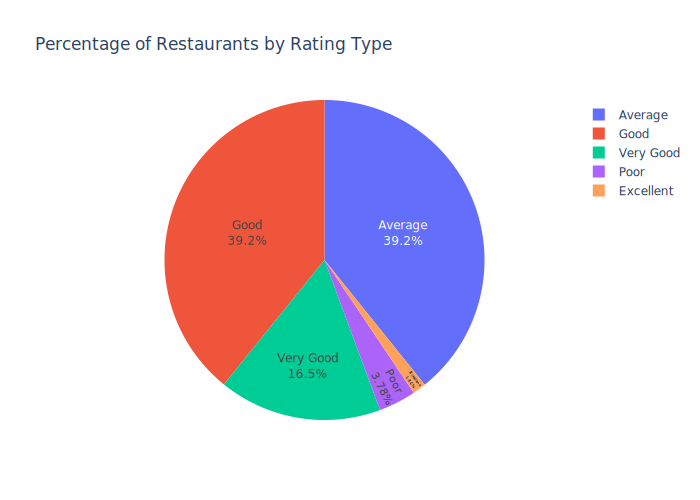

In [43]:
fig = px.pie(rating_counts, names='Rating Type', values='COUNT OF RESTAURANTS', color='Rating Type',
             title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show() 
    

#**Q3) Which are the Top 10 highest rated Seafood Restaurant in chennai?**

In [44]:
seafood_df = Chennai_zomato_df[Chennai_zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df.sort_values(by='Dining Rating',ascending=False)
top10_seafood_df=seafood_df.head(10)
top10_seafood_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating type
14,Hotel Paramount,Kilpauk,' Seafood',"['Biryani', ' Butter Chicken', ' Tandoori Chic...",500,4.3,1266,4.2,17700,"['Breakfast', 'Home Delivery', 'Indoor Seating...",Very Good
17,Abid's,Chetpet,['Seafood',"['Haleem', ' Hyderabadi Dum Biryani', ' Brinja...",1200,4.2,742,4.1,3020,"['Home Delivery', 'Valet Parking Available', '...",Very Good
25,Salem RR Briyani Unavagam,Velachery,' Seafood',"['Chicken 65', ' Mutton Biryani', ' Tandoori C...",550,4.2,1180,4.0,1717,"['Home Delivery', 'Indoor Seating', 'Catering ...",Very Good
49,Sea Emperor,Madipakkam,' Seafood'],"['Chicken Grill', ' Shawarma', ' Bbq Chicken',...",900,3.8,602,3.9,6855,"['Home Delivery', 'Indoor Seating', 'Catering ...",Good
53,Copper Kitchen,Saligramam,' Seafood'],"['Biryani', ' Fish', ' Bbq Chicken', ' Banana ...",1000,4.2,2275,3.9,15800,"['Home Delivery', 'Lunch Menu', 'Valet Parking...",Very Good
64,Samco,Velachery,' Seafood'],"['Biryani', ' Bbq Chicken', ' Faluda', ' Peppe...",800,4.3,1078,3.7,3862,"['Home Delivery', 'Valet Parking Available', '...",Very Good
80,Al-Najeeb Nawab Of Kebab,Kilpauk,' Seafood'],"['Shawarma', ' Biryani', ' Rolls', ' Chicken S...",500,4.1,345,4.0,8824,"['Home Delivery', 'Indoor Seating', 'Free Park...",Very Good
83,Biryani House,Mogappair,' Seafood',"['Hyderabadi Biryani', ' Prawn Biryani', ' Tan...",550,4.1,669,3.6,17900,"['Home Delivery', 'Free Parking', 'Brunch', 'I...",Very Good
96,Urban Spatula,Anna Nagar,' Seafood',"['Burgers', ' Pasta', ' Fish', ' Fries', ' Chi...",800,4.4,794,4.3,911,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good
109,Hotel Safari,Royapettah,' Seafood',"['Paratha', ' Tea', ' Paya', ' Coffee', ' Mutt...",450,4.1,516,4.2,3857,"['Breakfast', 'Home Delivery', 'Indoor Seating']",Very Good


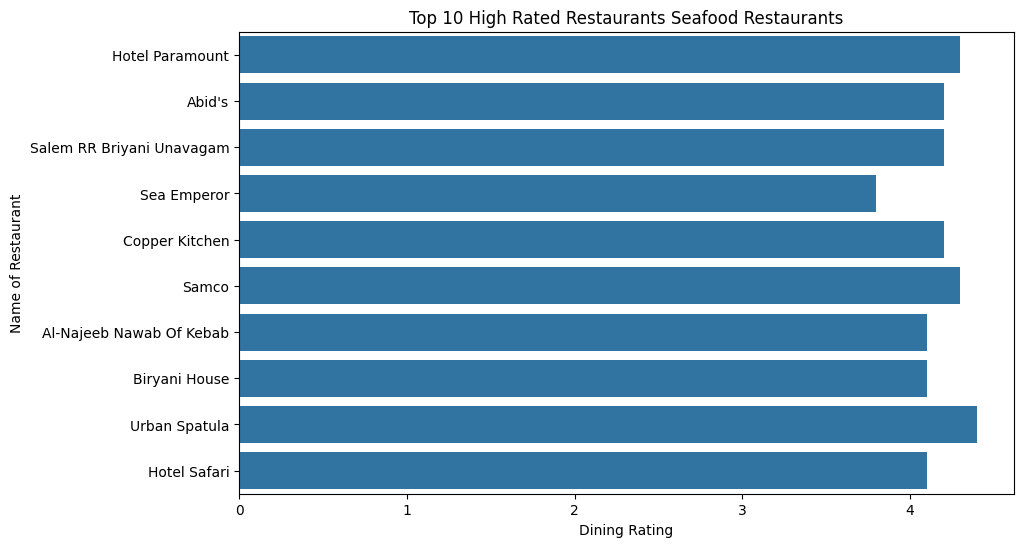

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='Dining Rating',y='Name of Restaurant',data=top10_seafood_df)
plt.title('Top 10 High Rated Restaurants Seafood Restaurants')
plt.show()           

#**Q4)a. Which restaurant provides the best Continental food(Dining)in Chennai?**

In [46]:
continental_df = Chennai_zomato_df[Chennai_zomato_df['Cuisine'].str.contains('Continental')]
continental_df.sort_values(by='Dining Rating',ascending=False,inplace=True) 
continental_df


C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\210188581.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating type
184,Gossip Fusion Bistro,Kanathur,' Continental',"['Tender Coconut Mousse', ' Iced Tea', ' Pasta...",1500,4.9,996,4.3,500,"['Breakfast', 'Home Delivery', 'Free Parking',...",Excellent
67,Pumpkin Tales,Alwarpet,' Continental',"['Pumpkin Soup', ' Bibimbap', ' Noodle', ' Che...",1800,4.5,768,4.0,245,"['Breakfast', 'Home Delivery', 'Indoor Seating...",Excellent
68,Sandy's Chocolate Laboratory,Nungambakkam,' Continental',"['Tiny Chocolate Cake', ' Hot Chocolate', ' Sa...",1400,4.5,2252,4.3,1973,"['Breakfast', 'Home Delivery', 'Free Parking',...",Excellent
9228,Blind Ch3mistry,Besant Nagar,' Continental',"['Pasta', ' Waffles', ' Sandwich', ' Chocolate...",700,4.5,1893,4.0,275,"['Home Delivery', 'Indoor Seating', 'Table res...",Excellent
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,' Continental'],"['Cocktails', ' Pasta', ' Nachos', ' Mashed Po...",1600,4.5,964,3.4,50,"['Home Delivery', 'Full Bar Available', 'Free ...",Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9532,Cheesy Juicy Burgers,Kodambakkam,' Continental',"['Burgers', ' Chicken Burger', ' Paneer Burger...",500,3.3,80,3.9,353,"['Home Delivery', 'Free Parking', 'Indoor Seat...",Average
9333,La Chocolate,Nungambakkam,' Continental',"['Truffle', ' Brownie']",800,3.2,91,4.2,622,"['Home Delivery', 'Vegetarian Only', 'Indoor S...",Average
1567,24x7 Bytes,"Gokulam Park Sabari - OMR, Old Mahabalipuram R...",' Continental',['Punjabi Chicken'],1100,3.1,83,3.7,147,"['Breakfast', 'Home Delivery', 'Wheelchair Acc...",Average
1533,The Balcony Cafe,Nungambakkam,' Continental'],"['Burgers', ' English Breakfast', ' Fries', ' ...",600,2.9,51,4.1,121,"['Home Delivery', 'Indoor Seating']",Average


#**Q4) Which restaurant provides the best Continental food (Delivery) in Chennai?**

In [47]:
continental_df = Chennai_zomato_df[Chennai_zomato_df['Cuisine'].str.contains('Continental')]
continental_df.sort_values(by='Delivery Rating',ascending=False,inplace=True) 
continental_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\108311134.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating type
164,La Chocolate,Egmore,' Continental',"['Brownie', ' Red Velvet', ' Photo Cake', ' Ch...",800,4.0,256,4.5,1574,"['Home Delivery', 'Vegetarian Only', 'Free Par...",Very Good
350,Santé Spa Cuisine,Nungambakkam,' Continental',"['Pasta', ' Pav Bhaji', ' Dumplings', ' Irish ...",1300,4.4,378,4.4,257,"['Home Delivery', 'Vegetarian Only', 'Table bo...",Very Good
150,Rain Forest,Adyar,' Continental',"['Dragon Chicken', ' Naan', ' Noodle', ' Chick...",800,4.2,1534,4.4,726,"['Home Delivery', 'Indoor Seating', 'Wifi']",Very Good
9332,La Chocolate,Thiruvanmiyur,' Continental',"['Potato Wedges', ' Fries', ' Cold Coffee', ' ...",800,3.9,83,4.3,1735,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",Good
68,Sandy's Chocolate Laboratory,Nungambakkam,' Continental',"['Tiny Chocolate Cake', ' Hot Chocolate', ' Sa...",1400,4.5,2252,4.3,1973,"['Breakfast', 'Home Delivery', 'Free Parking',...",Excellent
...,...,...,...,...,...,...,...,...,...,...,...
152,Pause Bar & Kitchen,"OMR Food Street, Kandanchavadi",' Continental',"['Pizza', ' Beer', ' Cocktails', ' Burgers', '...",1200,4.3,607,3.3,107,"['Home Delivery', 'Full Bar Available', 'Live ...",Very Good
299,Convo@C20,Adyar,' Continental',"['Hot Chocolate', ' Pizza', ' Hot Wings', ' Ch...",1000,4.1,417,3.2,712,"['Home Delivery', 'Board Games', 'Indoor Seati...",Very Good
656,Avatar,Porur,' Continental'],"['Garlic Naan', ' Onion Rings', ' Malai Kofta'...",800,3.8,209,3.2,97,"['Home Delivery', 'Free Parking', 'Indoor Seat...",Good
3864,Pizzeria,GST Road,['Continental',Invalid,300,3.7,15,3.1,190,"['Home Delivery', 'Outdoor Seating']",Good


#**Q5) Which places have the highest rated restaurant for delivery in Chennai?**

In [48]:
highest_rated_df = Chennai_zomato_df[Chennai_zomato_df['Delivery Rating'] >= 4.5]
highest_rated_df.sort_values(by='Delivery Rating',ascending=False,inplace=True) 


C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\1249634968.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
highest_rated_df.head(5)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating type
9977,ibaco,Mylapore,['Ice Cream'],['Brownie'],200,3.6,55,4.7,230,"['Home Delivery', 'Vegetarian Only', 'Desserts...",Good
4371,Mumbai Kulfi,Pallavaram,['Desserts'],Invalid,150,3.7,11,4.7,141,"['Home Delivery', 'Free Parking', 'Outdoor Sea...",Good
1985,Arabian Plate,Adambakkam,' Biryani'],Invalid,300,3.7,58,4.7,491,"['Home Delivery', 'Indoor Seating']",Good
1985,Arabian Plate,Adambakkam,['Arabian',Invalid,300,3.7,58,4.7,491,"['Home Delivery', 'Indoor Seating']",Good
9775,That Waffle Place !,Royapettah,['Desserts',Invalid,300,3.7,29,4.6,1014,"['Home Delivery', 'Vegetarian Only', 'Outdoor ...",Good


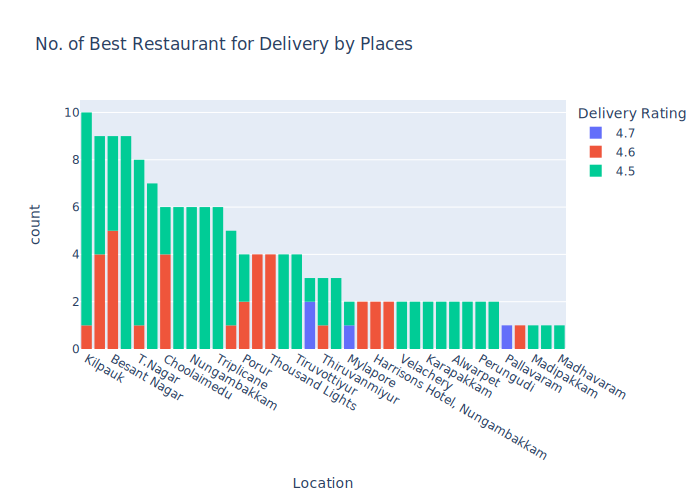

In [50]:
fig = px.histogram(highest_rated_df, x='Location', color='Delivery Rating',
                   title= 'No. of Best Restaurant for Delivery by Places').update_xaxes(categoryorder="total descending")
                                                                                                
fig.show() 

#**Q6) What is the Avg Price Distibution of highest rated restaurant for Delivery Rating in Chennai?**


In [51]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Delivery Rating'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head() 

,Location,Delivery Rating,Price for 2
0,Adambakkam,4.5,200.0
1,Adambakkam,4.7,300.0
2,Adyar,4.5,300.0
3,Alwarpet,4.5,500.0
4,Anna Nagar,4.5,400.0


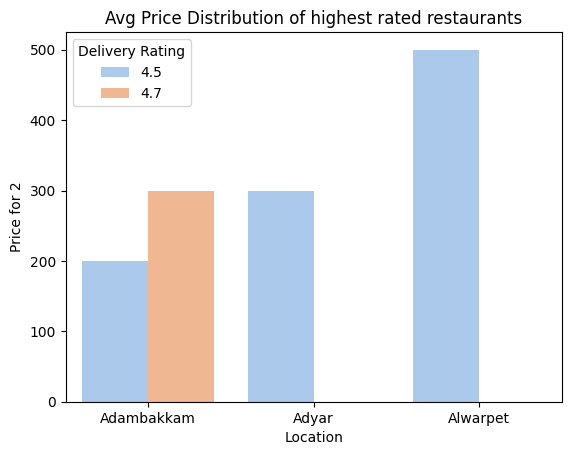

In [52]:
sns.barplot(x = "Location", y = "Price for 2", data = highest_rated_price_df.head(4),hue="Delivery Rating",palette="pastel").set_title("Avg Price Distribution of highest rated restaurants")
plt.show()


#**Q7) Which areas have a large number of Chinese Restaurant Market?**


In [53]:
chinese_df =Chennai_zomato_df[Chennai_zomato_df['Cuisine'].str.contains('Chinese')]
chinese_df 

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating type
2,SS Hyderabad Biryani,Kodambakkam,' Chinese',"['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']",Very Good
4,Tasty Kitchen,Perambur,['Chinese',"['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']",Very Good
5,Dine N Fun,Medavakkam,' Chinese'],"['Chicken Grill', ' Shawarma', ' Naan', ' Chic...",450,4.1,567,3.8,24700,"['Home Delivery', 'Indoor Seating']",Very Good
8,Savoury Sea Shell,Anna Nagar,' Chinese',"['Shawarma', ' Chicken Grill', ' Brownie', ' S...",1400,4.2,2564,4.1,21700,"['Home Delivery', 'Indoor Seating', 'Card Upon...",Very Good
9,Sangeetha Veg Restaurant,T.Nagar,' Chinese',"['Filtered Coffee', ' Chaat', ' Faluda', ' Mas...",800,4.4,1578,4.2,39600,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",Very Good
...,...,...,...,...,...,...,...,...,...,...,...
11382,Texas Treat,Selaiyur,' Chinese',Invalid,850,3.8,9,3.8,43,"['Home Delivery', 'Vegetarian Only', 'Free Par...",Good
11544,Anandhi Idly Kadai,Medavakkam,' Chinese'],Invalid,200,3.4,24,4.1,778,"['Home Delivery', 'Indoor Seating']",Average
11545,Anandhi Idly Kadai,Selaiyur,' Chinese'],Invalid,200,3.1,17,4.1,367,"['Breakfast', 'Home Delivery', 'Indoor Seating']",Average
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,' Chinese',Invalid,200,3.2,6,3.9,48,"['Home Delivery', 'Indoor Seating']",Average


In [54]:
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns= {'Name of Restaurant' :'COUNT OF RESTAURANTS','Price for 2':'Price'}).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(10)
chinese_rest_df.head(25)

,Location,COUNT OF RESTAURANTS,Price
11,Anna Nagar,95,585.789474
87,Porur,58,490.517241
6,Ambattur,52,415.384615
106,T.Nagar,47,501.063830
122,Velachery,46,576.086957
83,Perambur,45,476.666667
50,Kolathur,45,448.888889
90,Ramapuram,43,445.348837
60,Medavakkam,42,530.952381
116,Thuraipakkam,41,578.048780


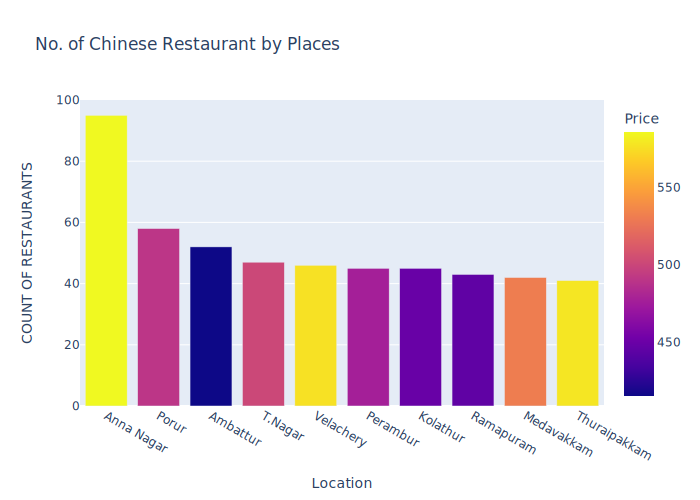

In [55]:
fig = px.bar(chinese_rest_df, x='Location', y='COUNT OF RESTAURANTS', color='Price', title= 'No. of Chinese Restaurant by Places')
fig.show() 


#**Q8) Is there a relation between Price and Dining Rating by each Cuisine Type?**


In [56]:
price_rating_df =Chennai_zomato_df.groupby(['Cuisine', 'Dining Rating'])['Price for 2'].mean().reset_index()
price_rating_df 

,Cuisine,Dining Rating,Price for 2
0,' American',3.2,400.0
1,' American',3.8,1000.0
2,' American',3.9,600.0
3,' American',4.1,1000.0
4,' American',4.3,1050.0
...,...,...,...
2091,['Tibetan',3.6,400.0
2092,['Tibetan',3.8,450.0
2093,['Tibetan',4.1,250.0
2094,['Tibetan',4.2,350.0


In [57]:
fig = px.line(price_rating_df, y="Price for 2", x="Dining Rating",color='Cuisine',title='Relation between Dining Rating and Price') 

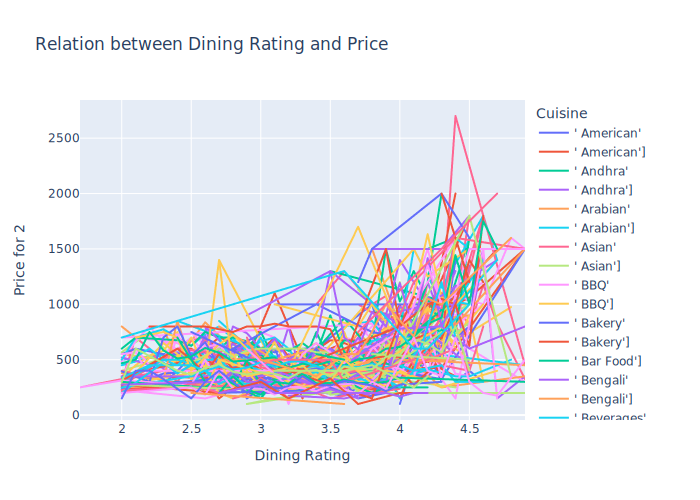

In [58]:
fig.show()

#**Q9) Is there a relation between Region and Price?**

In [59]:
region_price_df =Chennai_zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

,Location,Price for 2
0,Coast Road (ECR),1162.500000
1,Mambalam,311.194030
2,Abhiramapuram,200.000000
3,Adambakkam,350.568182
4,Adyar,588.025890
...,...,...
154,Velachery,480.107527
155,Vepery,430.392157
156,Vettuvankeni,545.454545
157,Virugambakkam,458.333333


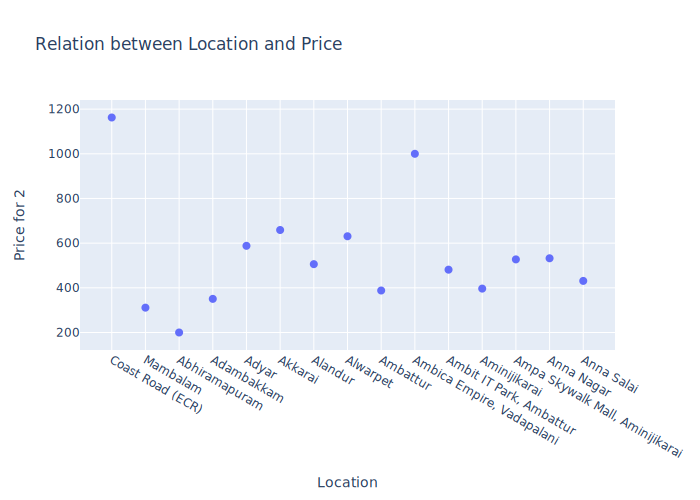

In [60]:
fig = px.scatter(region_price_df.head(15), x="Location", y="Price for 2",title="Relation between Location and Price").update_traces(marker_size=8) 
fig.show()

#**Q10) Find the list of Affordable Restaurants?**

The criteria for Affordable Restaurants would be:
1
Low Price 2) Highateddd First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our datafre0.

In [61]:
max_price = Chennai_zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price 

750.0

In [62]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df =Chennai_zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location']] 
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 750] 
aff_rest_df.sort_values(by='Price for 2', inplace=True) 
aff_rest_df 

,Name of Restaurant,Price for 2,Cuisine,Location
5547,Mylapore Filter Coffee,100,['Street Food',Nungambakkam
6076,Hotel Arusuvaai,100,['South Indian'],Pallikaranai
6039,Fruit Gallery Juice Shop,100,' Juices'],Perambur
6039,Fruit Gallery Juice Shop,100,['Beverages',Perambur
3542,Vijayarams Coffee,100,' Street Food'],T.Nagar
...,...,...,...,...
427,Al Souk,750,' Turkish',Nungambakkam
9459,Aasife Biriyani,750,' North Indian',Selaiyur
9459,Aasife Biriyani,750,['Biryani',Selaiyur
9461,Aasife Biriyani,750,' North Indian',Poonamalle


In [63]:
# Finding the highest rated list of restaurants 
highrate_rest_df =Chennai_zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location','Dining Rating']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['Dining Rating'] >= 4.5]
highrate_rest_df.sort_values(by='Price for 2', inplace=True) 
highrate_rest_df.head(10)

,Name of Restaurant,Price for 2,Cuisine,Location,Dining Rating
108,Rayar's Mess,100,['South Indian'],Mylapore,4.7
178,Royal Sandwich Shop,150,' Beverages'],Alwarpet,4.7
178,Royal Sandwich Shop,150,' Desserts',Alwarpet,4.7
178,Royal Sandwich Shop,150,['Fast Food',Alwarpet,4.7
320,Bombay Kulfi,200,['Ice Cream'],Adyar,4.9
9541,Bombay Kulfi,200,['Ice Cream'],Anna Nagar,4.6
50,Andhikkadai,200,['South Indian'],Velachery,4.6
24,Eating Circles,250,['South Indian'],Alwarpet,4.7
155,The Sandwich Shop,300,['Sandwich',Mambalam,4.9
155,The Sandwich Shop,300,' Fast Food',Mambalam,4.9


In [64]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant','Price for 2','Location'])
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2', 'Cuisine_x', 'Location','Dining Rating']]
highrate_aff_df.rename(columns={'Name of REstaurant':'Name of Restaurant','Price for 2':'Price for 2','Cuisine_x':'CUSINE_CATEGORY',
                                'Location':'Location'},inplace=True) 
highrate_aff_df


,Name of Restaurant,Price for 2,CUSINE_CATEGORY,Location,Dining Rating
0,Rayar's Mess,100,['South Indian'],Mylapore,4.7
1,Royal Sandwich Shop,150,['Fast Food',Alwarpet,4.7
2,Royal Sandwich Shop,150,['Fast Food',Alwarpet,4.7
3,Royal Sandwich Shop,150,['Fast Food',Alwarpet,4.7
4,Royal Sandwich Shop,150,' Desserts',Alwarpet,4.7
...,...,...,...,...,...
225,Blind Ch3mistry,700,' Italian',Teynampet,4.5
226,Blind Ch3mistry,700,' Italian',Teynampet,4.5
227,Blind Ch3mistry,700,' Italian',Teynampet,4.5
228,Blind Ch3mistry,700,' Italian',Teynampet,4.5


#**Q10) Find the list of most Reliable Restaurants?**

The criteria for most Reliable Restaurants would be:
1)
Low Price 2) High Rated 3) Large No. of Veses
First step will be to find the restaurants with Votes greater than Mean of Votes

In [65]:
mean_votes =Chennai_zomato_df['Dining Rating Count'].mean() 
mean_votes 

204.7066850783852

In [66]:
# Finding list of restaurants that have Votes greater than and equal to  Mean of Vote 
mean_rest_df=Chennai_zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location','Dining Rating Count']]
mean_rest_df = mean_rest_df[mean_rest_df['Dining Rating Count'] > 204]
mean_rest_df.sort_values(by='Dining Rating Count', inplace=True)
mean_rest_df 

,Name of Restaurant,Price for 2,Cuisine,Location,Dining Rating Count
969,Seasons,700,' Chinese'],Selaiyur,205
907,The Track,550,['North Indian',Kotturpuram,205
907,The Track,550,' Chinese',Kotturpuram,205
907,The Track,550,' Continental',Kotturpuram,205
907,The Track,550,' Seafood',Kotturpuram,205
...,...,...,...,...,...
74,Onesta,600,' Desserts'],Semmancheri,5407
74,Onesta,600,' Fast Food',Semmancheri,5407
74,Onesta,600,' Italian',Semmancheri,5407
74,Onesta,600,['Pizza',Semmancheri,5407


In [67]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['Name of Restaurant','Price for 2', 'Location'])
reliable_rest_df = reliable_rest_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location',]]
reliable_rest_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2':'Price for 2', 'Cuisine':'CUSINE_CATEGORY',   
                                 'Location':'Location'},inplace=True) 
reliable_rest_df 

,Name of Restaurant,Price for 2,CUSINE_CATEGORY,Location
0,Shmoozie's Hand-Crafted Ice Creams,400,' Desserts'],Egmore
1,Shmoozie's Hand-Crafted Ice Creams,400,' Desserts'],Egmore
2,Shmoozie's Hand-Crafted Ice Creams,400,' Desserts'],Egmore
3,Shmoozie's Hand-Crafted Ice Creams,400,' Desserts'],Egmore
4,Shmoozie's Hand-Crafted Ice Creams,400,['Ice Cream',Egmore
...,...,...,...,...
815,Blind Ch3mistry,700,' Beverages'],Besant Nagar
816,Blind Ch3mistry,700,' Beverages'],Besant Nagar
817,Blind Ch3mistry,700,' Beverages'],Besant Nagar
818,Blind Ch3mistry,700,' Beverages'],Besant Nagar


In [68]:
#Chennai_zomato_df.to_csv("ZomaChennPreprocess.csv",index=False)

In [69]:
park_rest=Chennai_zomato_df[Chennai_zomato_df['Features'].str.contains('Free Parking')]
park_rest

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating type
1,Sukkubhai Biriyani,Alandur,['Biryani',"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good
1,Sukkubhai Biriyani,Alandur,' North Indian',"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good
1,Sukkubhai Biriyani,Alandur,' Mughlai',"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good
1,Sukkubhai Biriyani,Alandur,' Desserts',"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good
1,Sukkubhai Biriyani,Alandur,' Beverages'],"['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good
...,...,...,...,...,...,...,...,...,...,...,...
11382,Texas Treat,Selaiyur,' Chinese',Invalid,850,3.8,9,3.8,43,"['Home Delivery', 'Vegetarian Only', 'Free Par...",Good
11382,Texas Treat,Selaiyur,' Italian',Invalid,850,3.8,9,3.8,43,"['Home Delivery', 'Vegetarian Only', 'Free Par...",Good
11382,Texas Treat,Selaiyur,' Mexican',Invalid,850,3.8,9,3.8,43,"['Home Delivery', 'Vegetarian Only', 'Free Par...",Good
11382,Texas Treat,Selaiyur,' Fast Food',Invalid,850,3.8,9,3.8,43,"['Home Delivery', 'Vegetarian Only', 'Free Par...",Good


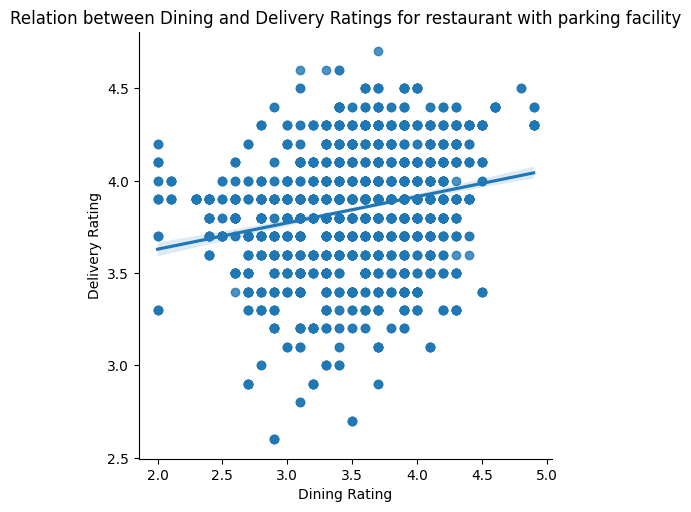

In [70]:
sns.lmplot(x='Dining Rating',y='Delivery Rating',data=park_rest)
plt.title('Relation between Dining and Delivery Ratings for restaurant with parking facility')
plt.xlabel('Dining Rating')
plt.ylabel('Delivery Rating')
plt.show()

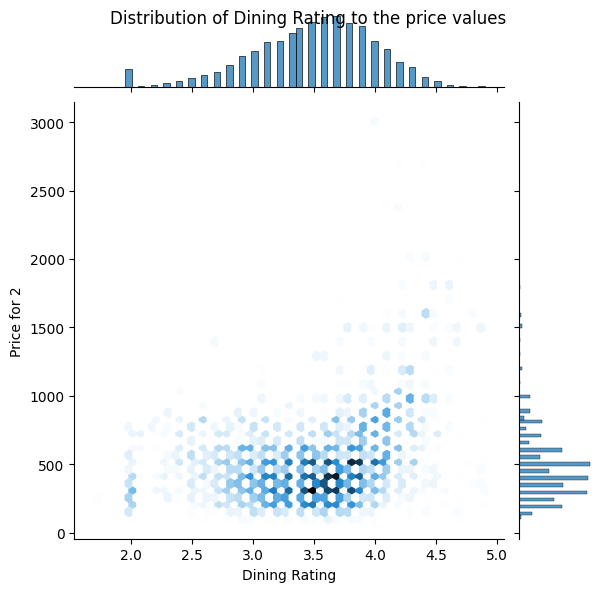

In [71]:
Jointplot=sns.jointplot(x = 'Dining Rating',y = 'Price for 2',data = Chennai_zomato_df,kind='hex')
Jointplot.fig.suptitle('Distribution of Dining Rating to the price values')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\4213203024.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price for 2', ylabel='Density'>

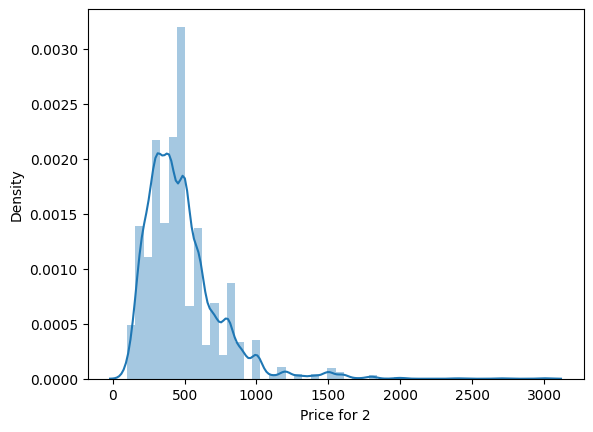

In [72]:
sns.distplot(Chennai_zomato_df["Price for 2"])

In [73]:
def get_pdf_probability(Chennai_zomato_df,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(Chennai_zomato_df,kde=True,kde_kws={'color':'blue'},color='Yellow')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    plt.title('Density of the price distribution from 100 to 1000')
    # generate a sample
    sample = Chennai_zomato_df
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\2273844920.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Mean=480.028, Standard Deviation=259.805
The area between range(100,1000):0.9057154179013566


0.9057154179013566

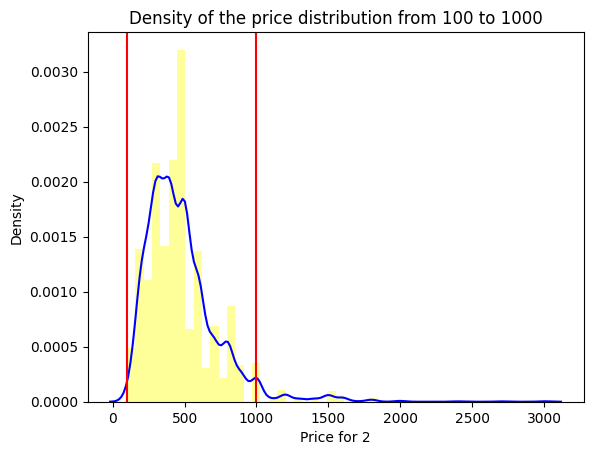

In [74]:
get_pdf_probability(Chennai_zomato_df["Price for 2"],100,1000)

#**90% price rate is below average in chennai restaurants**